In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


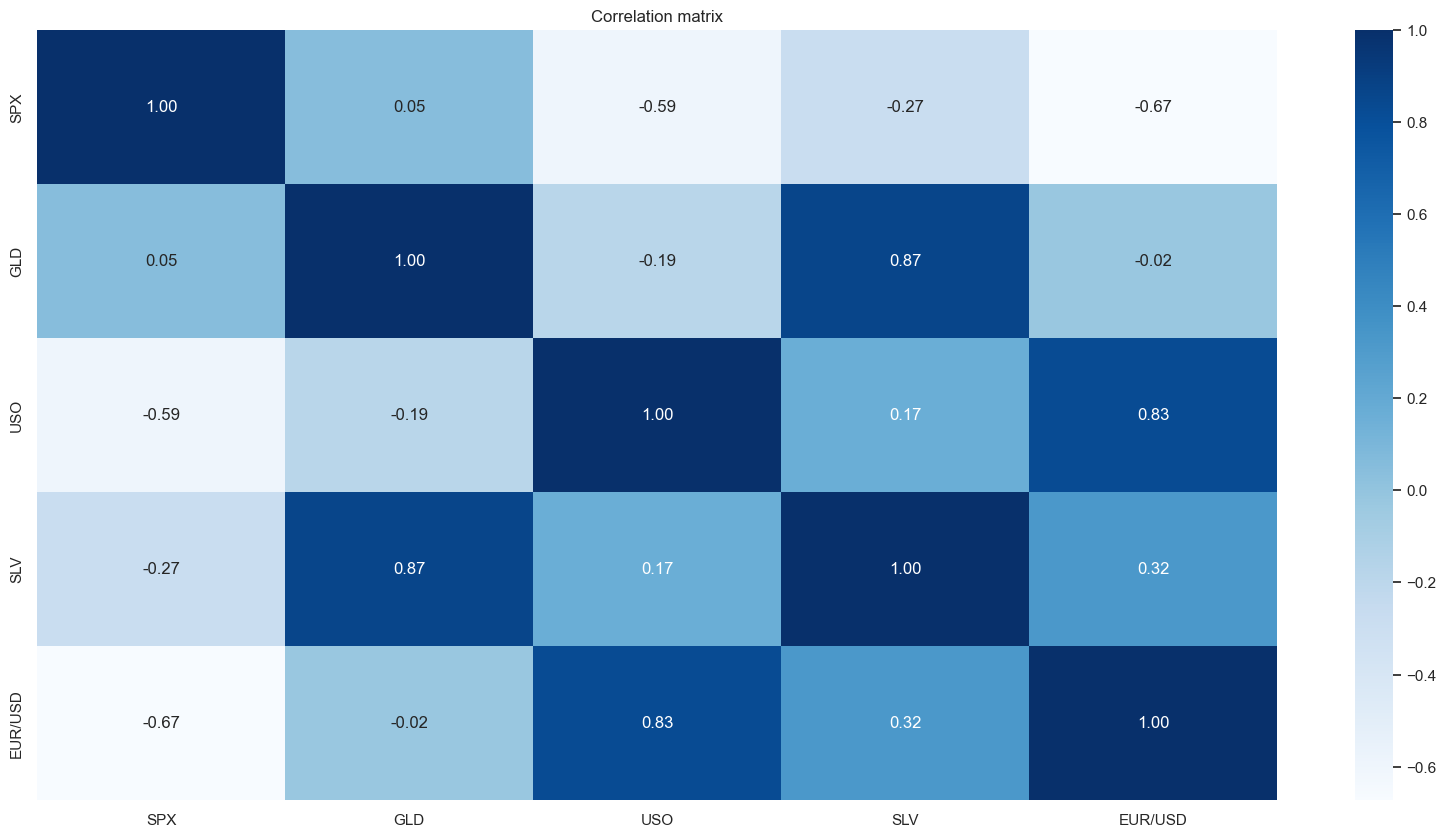

In [21]:
corr = df.drop('Date', axis=1).corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation matrix")
plt.show()

C:\Users\prajualr\AppData\Local\Temp\ipykernel_16136\3030281137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

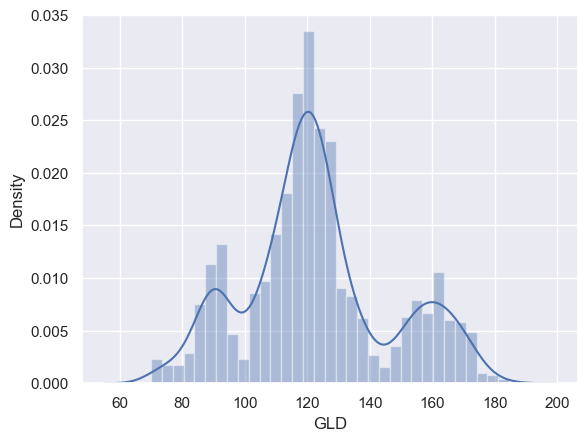

In [25]:
sns.distplot(df['GLD'])

In [27]:
X = df.drop(columns=['GLD','Date'], axis = 1)
y = df['GLD']

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 56.16559421500604
R² Score: 0.8975640982991402


In [39]:
import numpy as np

# Make sure you used StandardScaler and X.columns is preserved
feature_names = X.columns
coefficients = model.coef_

# Pair them up
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


SPX: 3.4282
USO: -4.8879
SLV: 22.1994
EUR/USD: -1.4314


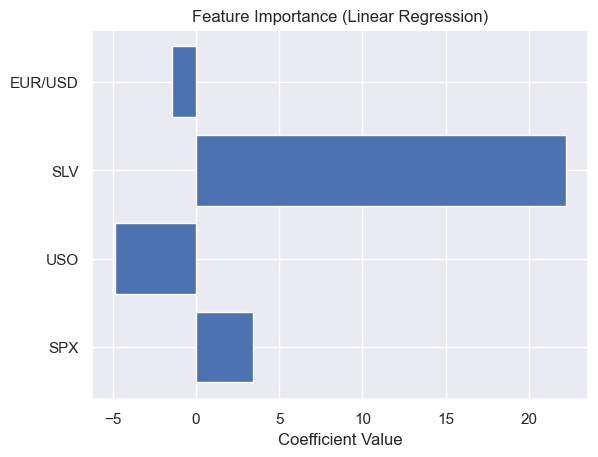

In [41]:
import matplotlib.pyplot as plt

plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.grid(True)
plt.show()


In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred1 = rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))

R2 Score: 0.9894101317851988
MSE: 5.806423637289321


In [51]:
importances = rf.feature_importances_ 
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


SPX: 0.1726
USO: 0.0373
SLV: 0.7630
EUR/USD: 0.0270


In [45]:
# Option 1: Scaled features
model_scaled = RandomForestRegressor(random_state=42)
model_scaled.fit(X_scaled, y)
print("R2 (scaled):", model_scaled.score(X_scaled, y))

# Option 2: Raw features (no scaling)
model_raw = RandomForestRegressor(random_state=42)
model_raw.fit(X, y)
print("R2 (raw):", model_raw.score(X, y))


R2 (scaled): 0.9986888890185337
R2 (raw): 0.998689596954607
